Componente Principal 1: 0.7296
Componente Principal 2: 0.9581
Componente Principal 3: 0.9948
Componente Principal 4: 1.0000


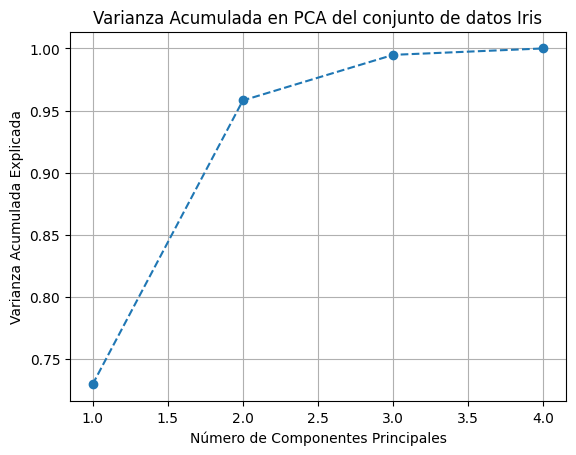

In [21]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data

# Estandarizar los datos (recomendado para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la matriz de covarianza
cov_matrix = np.cov(X_scaled, rowvar=False)

# Calcular los valores propios (eigenvalues) y vectores propios (eigenvectors)
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Ordenar los valores propios en orden descendente
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Calcular la varianza acumulada
total_variance = np.sum(eigenvalues_sorted)
variance_explained = np.cumsum(eigenvalues_sorted) / total_variance

# Imprimir la varianza acumulada para cada número de componentes principales
for i, explained_variance in enumerate(variance_explained):
    print(f"Componente Principal {i+1}: {explained_variance:.4f}")

# Visualizar la varianza acumulada en un gráfico
import matplotlib.pyplot as plt

plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada en PCA del conjunto de datos Iris')
plt.grid(True)
plt.show()

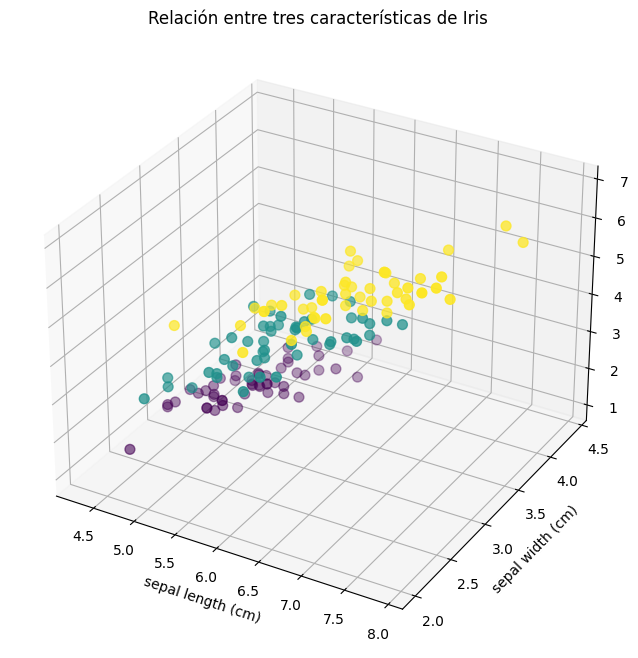

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Indices de las características que se utilizarán en el gráfico 3D
feature1_index = feature_names.index("sepal length (cm)")
feature2_index = feature_names.index("sepal width (cm)")
feature3_index = feature_names.index("petal length (cm)")

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D
ax.scatter(X[:, feature1_index], X[:, feature2_index], X[:, feature3_index], c=iris.target, cmap='viridis', s=50)
ax.set_xlabel(feature_names[feature1_index])
ax.set_ylabel(feature_names[feature2_index])
ax.set_zlabel(feature_names[feature3_index])
ax.set_title('Relación entre tres características de Iris')

plt.show()


 Estandarizados:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444



Calculo de la covarianza:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.006711,-0.118359,0.877604,0.823431
sepal width (cm),-0.118359,1.006711,-0.431316,-0.368583
petal length (cm),0.877604,-0.431316,1.006711,0.969328
petal width (cm),0.823431,-0.368583,0.969328,1.006711


Valores Propios (Eigenvalues):
[2.93808505 0.9201649  0.14774182 0.02085386]

Vectores Propios (Eigenvectors):
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Dimensiones del resultado de PCA: 150 x 2

Varianza Explicada por cada Componente Principal:
[0.72962445 0.22850762 0.03668922 0.00517871]

Resultado de PCA:
[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


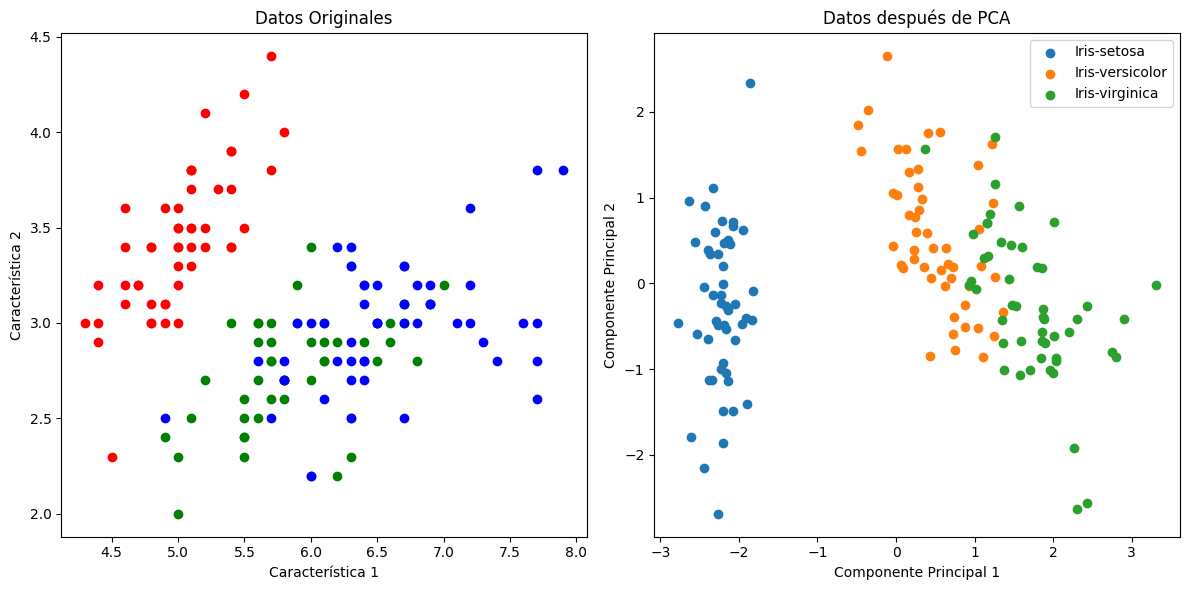

In [34]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Estandarizar los datos (opcional pero recomendado para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
iris_scaled = pd.DataFrame(data=X_scaled, columns=feature_names)
print("\n Estandarizados:")
display(iris_scaled.head())

# Visualizar los datos originales en un gráfico de dispersión en 2D
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for target, color in zip(np.unique(y), ['r', 'g', 'b']):
    indices_to_keep = y == target
    plt.scatter(X[indices_to_keep, 0], X[indices_to_keep, 1], c=color, label=target)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Datos Originales')

# Aplicar PCA
cov_matrix = np.cov(X_scaled, rowvar=False)
iris_covmat = pd.DataFrame(data=cov_matrix, columns=iris.feature_names)
iris_covmat.index = iris.feature_names
print("\nCalculo de la covarianza:")
display(iris_covmat)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Valores Propios (Eigenvalues):")
print(eigenvalues)
print("\nVectores Propios (Eigenvectors):")
print(eigenvectors)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
num_components = 2
top_eigenvectors = eigenvectors[:, :num_components]
X_pca = X_scaled.dot(top_eigenvectors)

# Obtener la dimensión de X_pca
num_filas, num_columnas = X_pca.shape
print("\nDimensiones del resultado de PCA:", num_filas, "x", num_columnas)


# Calcular la varianza explicada
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nVarianza Explicada por cada Componente Principal:")
print(explained_variance_ratio)

print("\nResultado de PCA:")
print(X_pca[:5, :])


class_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
plt.subplot(1, 2, 2)
for target in np.unique(y):
    indices_to_keep = y == target
    plt.scatter(X_pca[indices_to_keep, 0], X_pca[indices_to_keep, 1], label=class_mapping[target])

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos después de PCA')
plt.legend()
plt.tight_layout()
plt.show()